In [1]:
print("test")

test


In [2]:
import gdown
import zipfile
import os

file_id = '1ENSzYg3oMLSTqqzeB3pnD0GtGTLYdn1E'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Output zip filename
output_zip = 'dataset.zip'

# Download from Google Drive
gdown.download(download_url, output_zip, quiet=False)

# Unzip the file
extract_path = './data'  # You can change this path as needed
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


Downloading...
From: https://drive.google.com/uc?id=1ENSzYg3oMLSTqqzeB3pnD0GtGTLYdn1E
To: c:\Users\josiw\Documents\unibertsitatea\3.o\2.o cuatri\DeepLearning\anomaly-detection\dataset.zip
100%|██████████| 1.95M/1.95M [00:00<00:00, 11.6MB/s]


Extracted to: ./data


In [3]:
import pandas as pd

### EDA Process


In [4]:
df = pd.read_csv("./data/BTCUSDT_1h.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              38461 non-null  float64
 1   high              38461 non-null  float64
 2   low               38461 non-null  float64
 3   close             38461 non-null  float64
 4   volume            38461 non-null  float64
 5   close_time        38461 non-null  object 
 6   quote             38461 non-null  float64
 7   takers_buy_base   38461 non-null  float64
 8   takers_buy_quote  38461 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [6]:
df.describe()

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
count,38461.000000,38461.000000,38461.000000,38461.000000,38461.000000,3.846100e+04,38461.000000,3.846100e+04
mean,17589.002805,17696.560219,17473.314191,17589.962025,2101.814189,4.369855e+07,1046.701701,2.159233e+07
std,17359.685254,17463.372583,17249.006318,17359.989729,2175.337360,7.080532e+07,1066.267302,3.481741e+07
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,6726.000000,6752.760000,6695.490000,6726.110000,919.149470,7.125238e+06,470.170524,3.665090e+06
50%,9298.330000,9339.370000,9259.980000,9298.750000,1536.182670,1.545427e+07,773.216614,7.739254e+06
75%,19024.330000,19125.760000,18900.000000,19026.490000,2571.497519,5.187811e+07,1279.230445,2.529690e+07
max,68635.120000,69000.000000,68451.190000,68633.690000,47255.762685,1.514465e+09,20628.794047,6.849674e+08


In [7]:
df.head()

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,202366.138393,35.160503,150952.477943
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,100304.823567,21.448071,92608.279728
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,31282.312670,4.802861,20795.317224
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,19241.058300,2.602292,11291.347015
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4239.503586,0.814655,3552.746817


In [8]:
df.shape

(38461, 9)

In [9]:
df["close_time"].min(), df["close_time"].max()


('2017-08-16 23:59:59.999000-05:00', '2022-01-10 17:59:59.999000-05:00')

In [10]:
# Removing the localization in 'close_time'
df['close_time'] = pd.to_datetime(df['close_time'], errors='coerce')
df['close_time'] = df['close_time'].dt.tz_localize(None)
df

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999,2.023661e+05,35.160503,1.509525e+05
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999,1.003048e+05,21.448071,9.260828e+04
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999,3.128231e+04,4.802861,2.079532e+04
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999,1.924106e+04,2.602292,1.129135e+04
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999,4.239504e+03,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...
38456,41184.44,41723.87,41118.36,41604.58,1816.054560,2022-01-10 13:59:59.999,7.523858e+07,968.387390,4.012530e+07
38457,41604.58,41698.07,41205.65,41297.15,1358.541170,2022-01-10 14:59:59.999,5.637205e+07,690.382540,2.864461e+07
38458,41297.15,41779.46,41158.99,41714.72,1245.440490,2022-01-10 15:59:59.999,5.161796e+07,642.619620,2.663620e+07
38459,41716.81,41985.00,41562.38,41714.13,1365.382650,2022-01-10 16:59:59.999,5.703537e+07,724.557670,3.026707e+07


# 1. Pre-Processing

conversion to datetime

In [11]:
df['close_time'] = pd.to_datetime(df['close_time'])

make sure its sorted by date

In [12]:
df = df.sort_values('close_time').reset_index(drop=True)


hadle of missing/duplicate data

In [13]:
# Drop duplicates (if any)
df = df.drop_duplicates()

# Check for missing values
missing = df.isnull().sum()
print(missing)

# Optionally, fill or drop missing values
df = df.dropna()


open                0
high                0
low                 0
close               0
volume              0
close_time          2
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64


Feature Selection

In [14]:
features = ['open', 'high', 'low', 'close', 'volume', 'quote', 'takers_buy_base', 'takers_buy_quote']
data = df[features]


Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

import numpy as np
scaled_data = np.array(scaled_data)


Temporal Sequences

In [16]:
def create_sequences(data, seq_length=24):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
    return np.array(X)

sequence_length = 24  # You can adjust this
X_sequences = create_sequences(scaled_data, sequence_length)


In [17]:
df_plot = df.rename(columns={
    'close_time': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})

df_plot.set_index('Date', inplace=True)

# Filter to essential columns
df_plot = df_plot[['Open', 'High', 'Low', 'Close', 'Volume']]

In [18]:
import mplfinance as fplt

C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


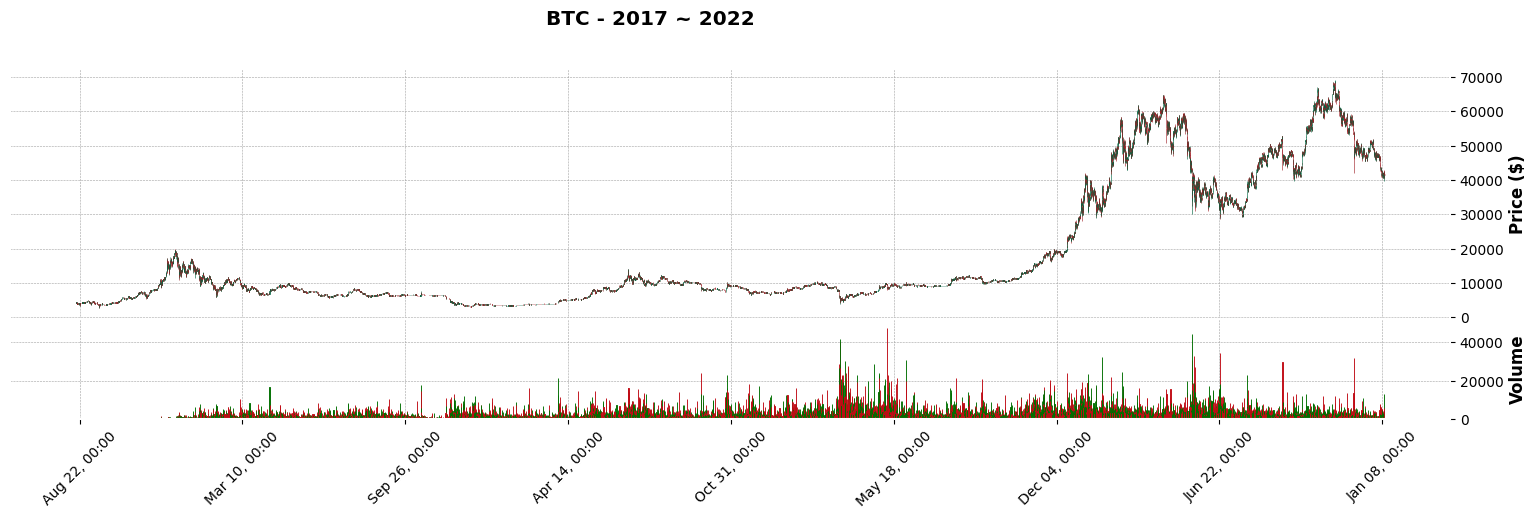

In [19]:
# Use either %matplotlib widget or %matplotlib inline in Jupyter
# %matplotlib widget
%matplotlib inline

# Plot
fplt.plot(
    df_plot,
    type='candle',
    style='charles',
    figsize=(20, 5),
    title='BTC - 2017 ~ 2022',
    ylabel='Price ($)',
    volume=True,
    ylabel_lower='Volume',
    show_nontrading=True
)


# 2. Anomaly Definition

This dataset does not come with labeled anomalies, so these are our options:

Usage of unsupervised anomaly detection

Manually or algorithmically labeled anomalies, defined by large spikes/drops in price or volume

## 1.st Approach
### Volatility Threshold Anomaly Detection

1. Anomaly Criteria Definition

We will flag anomalies when the price movement or volume is unusually high. For example:

Price change exceeds 3 standard deviations

Volume spikes beyond 3 standard deviations

2. Price Change and Z-scores Calculation

In [20]:
import numpy as np

# Calculate absolute price change between close and open
df['price_change'] = np.abs(df['close'] - df['open'])

# Calculate z-scores for price change and volume
df['z_price_change'] = (df['price_change'] - df['price_change'].mean()) / df['price_change'].std()
df['z_volume'] = (df['volume'] - df['volume'].mean()) / df['volume'].std()

# Define anomaly threshold (you can tweak this)
threshold = 3

# Mark anomalies: price or volume spike
df['anomaly'] = ((df['z_price_change'].abs() > threshold) | (df['z_volume'].abs() > threshold)).astype(int)


anomaly column:
1 = anomaly
0 = normal

3. Visualize Anomalies on a Candlestick Chart

C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


ValueError: x and y must be the same size

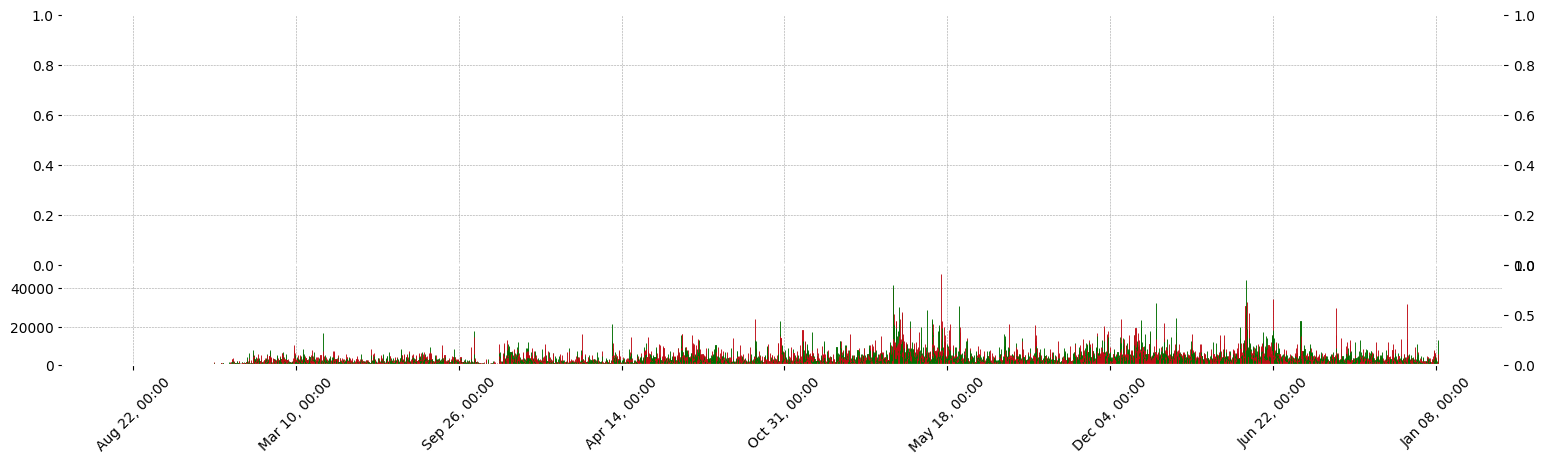

In [21]:
import mplfinance as fplt
import matplotlib.dates as mdates

# Use only necessary columns
df_plot = df.rename(columns={
    'close_time': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)
df_plot = df_plot[['Open', 'High', 'Low', 'Close', 'Volume', 'anomaly']]

# Extract anomaly points
anomaly_points = df_plot[df_plot['anomaly'] == 1]

# Create scatter plot over candlestick
anomaly_plot = fplt.make_addplot(
    anomaly_points['Close'], 
    type='scatter',
    markersize=100,
    marker='v',
    color='red'
)

# Plot with anomalies
fplt.plot(
    df_plot,
    type='candle',
    style='charles',
    figsize=(20, 5),
    title='BTC - 2017 ~ 2022 (Anomalies Highlighted)',
    ylabel='Price ($)',
    volume=True,
    ylabel_lower='Volume',
    addplot=anomaly_plot,
    show_nontrading=True
)


## 2.nd Approach
### Statistical methods

1st Option, Rolling Z-Score on Close Price

In [22]:
# Define rolling window
window = 24  # You can tune this — 24 hours = 1 day

# Rolling mean and std
df['rolling_mean'] = df['close'].rolling(window=window).mean()
df['rolling_std'] = df['close'].rolling(window=window).std()

# Z-score based on rolling statistics
df['rolling_z_score'] = (df['close'] - df['rolling_mean']) / df['rolling_std']

# Set threshold for anomaly detection
threshold = 3

# Flag anomalies
df['anomaly'] = df['rolling_z_score'].abs() > threshold


2nd Option, IQR-Based Detection on Volume

In [23]:
# Rolling IQR on volume
rolling_q1 = df['volume'].rolling(window=window).quantile(0.25)
rolling_q3 = df['volume'].rolling(window=window).quantile(0.75)
rolling_iqr = rolling_q3 - rolling_q1

# Define bounds
lower_bound = rolling_q1 - 1.5 * rolling_iqr
upper_bound = rolling_q3 + 1.5 * rolling_iqr

# Flag anomalies
df['anomaly_volume'] = (df['volume'] < lower_bound) | (df['volume'] > upper_bound)


Anomaly Criteria Combination

In [25]:
df['anomaly_combined'] = df['anomaly'] | df['anomaly_volume']
df['anomaly_combined'] = df['anomaly_combined'].astype(int)


Visualization

C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


ValueError: x and y must be the same size

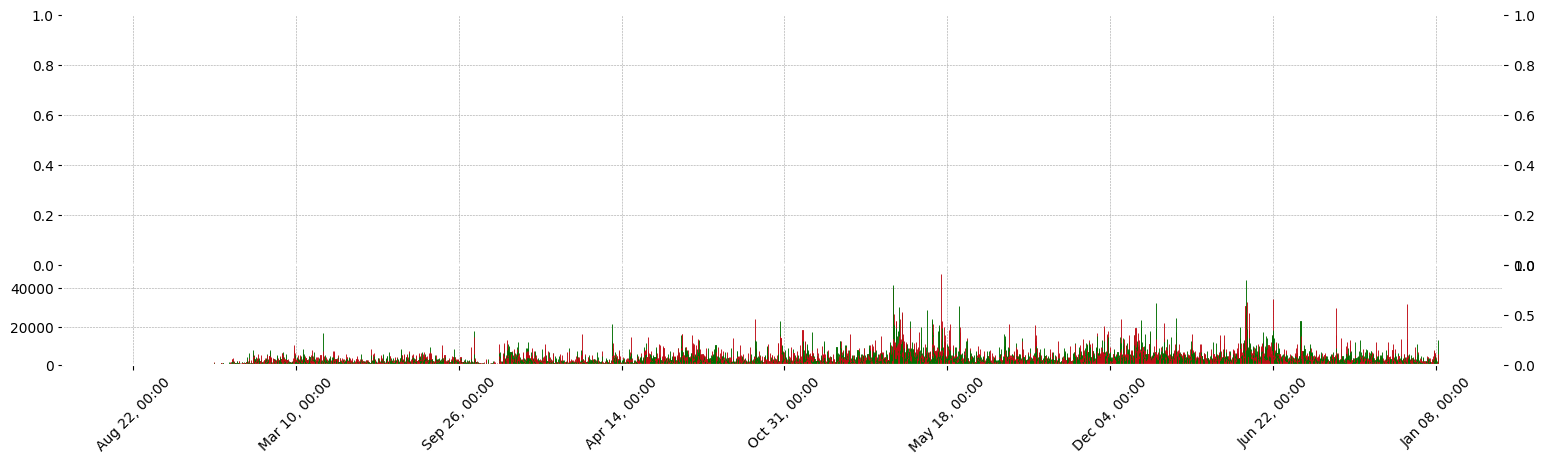

In [26]:
# Prepare df_plot again
df_plot = df.rename(columns={
    'close_time': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)

# Extract only necessary + anomaly column
df_plot = df_plot[['Open', 'High', 'Low', 'Close', 'Volume', 'anomaly_combined']]

# Highlight anomaly points
anomaly_points = df_plot[df_plot['anomaly_combined'] == 1]
anomaly_plot = fplt.make_addplot(
    anomaly_points['Close'],
    type='scatter',
    markersize=100,
    marker='v',
    color='red'
)

# Plot
fplt.plot(
    df_plot,
    type='candle',
    style='charles',
    figsize=(20, 5),
    title='BTC Price with Anomalies (Statistical Detection)',
    ylabel='Price ($)',
    volume=True,
    ylabel_lower='Volume',
    addplot=anomaly_plot,
    show_nontrading=True
)


## 3.d Approach
### Fully unsupervised: Autoencoder / LSTM-based model.

normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features and scale
features = ['open', 'high', 'low', 'close', 'volume', 'quote', 'takers_buy_base', 'takers_buy_quote']
data = df[features]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sliding windows
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
    return np.array(X)

sequence_length = 24
X = create_sequences(scaled_data, sequence_length)


LSTM Autoencoder in pytorch

In [28]:
import torch
import torch.nn as nn

X_tensor = torch.tensor(X, dtype=torch.float32)


class LSTMAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(LSTMAutoencoder, self).__init__()
        self.seq_len = seq_len
        self.n_features = n_features
        self.embedding_dim = embedding_dim

        # Encoder
        self.encoder = nn.LSTM(
            input_size=n_features,
            hidden_size=embedding_dim,
            batch_first=True
        )

        # Decoder
        self.decoder = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=n_features,
            batch_first=True
        )

    def forward(self, x):
        # Encode
        _, (hidden, _) = self.encoder(x)
        
        # Repeat hidden state across the sequence length
        repeated_hidden = hidden.repeat(self.seq_len, 1, 1).permute(1, 0, 2)

        # Decode
        decoded, _ = self.decoder(repeated_hidden)
        return decoded


Model Training (Basic LSTM)

In [36]:
# You can split into training/testing if you like
X_train = X[:int(0.8 * len(X))]

history = autoencoder.fit(
    X_train, X_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)


NameError: name 'autoencoder' is not defined

Basic LSTM Training Visualization

In [ ]:
#plot

Adding Dropout to the LSTM Training

During each training step, Dropout randomly disables ("drops out") a fraction of the neurons in a layer by setting their outputs to zero. This forces the network to not rely too heavily on any individual neuron and encourages redundant, robust representations

In [37]:
import torch
import torch.nn as nn

class LSTMAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(LSTMAutoencoder, self).__init__()
        self.seq_len = seq_len
        self.n_features = n_features
        self.embedding_dim = embedding_dim

        # Encoder
        self.encoder = nn.LSTM(
        input_size=n_features,
        hidden_size=embedding_dim,
        batch_first=True,
        dropout=0.3  # applies between LSTM layers if num_layers > 1
)

        # Decoder
        self.decoder = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=n_features,
            batch_first=True
        )

    def forward(self, x):
        # Encode
        _, (hidden, _) = self.encoder(x)
        
        # Repeat hidden state across the sequence length
        repeated_hidden = hidden.repeat(self.seq_len, 1, 1).permute(1, 0, 2)

        # Decode
        decoded, _ = self.decoder(repeated_hidden)
        return decoded


LSTM + Dropout Visualization

In [ ]:
#plot

Training with a learning rate scheduler

In [38]:
# Parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMAutoencoder(seq_len=sequence_length, n_features=X_tensor.shape[2]).to(device)

# Optimizer and Loss function
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Learning rate scheduler (ReduceLROnPlateau)
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)


C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(
C:\Users\josiw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [39]:
# Inside the training loop, after each epoch
learning_rates = []  # Access learning rate from optimizer


Training Loop

In [40]:
# Split data into training/validation
X_val = X_tensor[int(0.8 * len(X_tensor)):]  # 20% validation set
X_train = X_tensor[:int(0.8 * len(X_tensor))]  # 80% training set

# Training loop
n_epochs = 5
batch_size = 64

for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0

    for i in range(0, len(X_train), batch_size):
        batch = X_train[i:i+batch_size].to(device)
        output = model(batch)
        loss = criterion(output, batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val.to(device))
        val_loss = criterion(val_pred, X_val.to(device)).item()

    # Log the learning rate and step the scheduler
    learning_rate = optimizer.param_groups[0]['lr']  # Get current learning rate
    learning_rates.append(learning_rate)

    # Step the scheduler based on validation loss
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {epoch_loss:.6f}, Val Loss: {val_loss:.6f}, LR: {learning_rate:.6f}")

Epoch 1/5, Train Loss: 0.748596, Val Loss: 0.014503, LR: 0.001000
Epoch 2/5, Train Loss: 0.847975, Val Loss: 0.008286, LR: 0.001000
Epoch 3/5, Train Loss: 0.441299, Val Loss: 0.004614, LR: 0.001000
Epoch 4/5, Train Loss: 0.331876, Val Loss: 0.003850, LR: 0.001000
Epoch 5/5, Train Loss: 0.317874, Val Loss: 0.003927, LR: 0.001000


runned with 5 epoch for testing, later, i have to try with larger size

Training Process Visualization

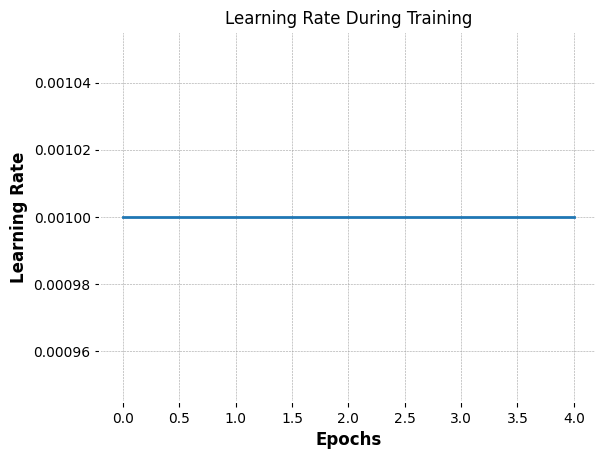

In [41]:
# Plot learning rate over time
plt.plot(learning_rates)
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate During Training")
plt.show()


Anomaly Detection Logic

In [42]:
# After training, compute reconstruction error for anomaly detection

model.eval()
with torch.no_grad():
    reconstructions = model(X_tensor.to(device))
    reconstruction_error = torch.mean((reconstructions - X_tensor.to(device)) ** 2, dim=(1, 2)).cpu().numpy()

# Define a threshold for anomalies
threshold = np.percentile(reconstruction_error, 95)  # Set the threshold for anomalies
anomaly_flags = reconstruction_error > threshold  # Mark anomalies


Anomaly Visualization

In [ ]:
import mplfinance as fplt

# Assuming `df_lstm` has the anomaly flags and the original Bitcoin price data
df_lstm['anomaly_lstm'] = anomaly_flags  # Add anomaly flags to the dataframe

# Prepare for mplfinance plot
df_plot = df_lstm.rename(columns={
    'close_time': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})

df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)

# Extract anomaly points
anomaly_points = df_plot[df_plot['anomaly_lstm'] == 1]

# Create anomaly overlay for the plot
anomaly_plot = fplt.make_addplot(
    anomaly_points['Close'],
    type='scatter',
    markersize=100,
    marker='v',
    color='orange'
)

# Final plot with candlesticks and anomalies
fplt.plot(
    df_plot,
    type='candle',
    style='charles',
    figsize=(20, 5),
    title='BTC Price with LSTM-Based Anomalies',
    ylabel='Price ($)',
    volume=True,
    ylabel_lower='Volume',
    addplot=anomaly_plot,
    show_nontrading=True
)


# 3. Modeling